In [26]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs

In [75]:
import seaborn as sns

In [43]:
Namess=[]
Ratingss=[]
Votess=[]
Info=[]
Pricess=[]


In [44]:
for i in range(1,6):
    url='https://www.flipkart.com/search?q=mobile+5g&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page='+str(i)
    req=requests.get(url)
    con=bs(req.content,'html.parser')
    store=con.find_all('div',class_='_3pLy-c row')
    for data in store:
        name=data.find('div',class_='_4rR01T').text
        Namess.append(name)
        
        rating=data.find('div',class_='_3LWZlK').text if data.find('div',class_='_3LWZlK') else "***"
        Ratingss.append(rating)
        
        votes=data.find('span',class_='_2_R_DZ').text if data.find('span',class_='_2_R_DZ') else "**"
        Votess.append(votes)
        
        inf=data.find('ul',class_='_1xgFaf').text
        Info.append(inf)
        
        price=data.find('div',class_='_30jeq3 _1_WHN1').text
        Pricess.append(price)
        
        
        
        
        


In [88]:
df=pd.DataFrame()

In [89]:

len(Votess)

120

In [90]:
len(Namess)

120

In [91]:

len(Ratingss)

120

In [92]:
df['Name']=Namess
df['Rating']=Ratingss
df['Votes']=Votess
df['Detail']=Info
df['Price']=Pricess

In [93]:
df

,Name,Rating,Votes,Detail,Price
0,"APPLE iPhone 14 (Blue, 128 GB)",4.6,"1,421 Ratings & 80 Reviews",128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,"₹66,999"
1,"POCO M4 Pro 5G (Cool Blue, 128 GB)",4.2,"42,292 Ratings & 3,788 Reviews",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,"₹13,999"
2,"APPLE iPhone 14 (Purple, 128 GB)",4.6,"1,421 Ratings & 80 Reviews",128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,"₹67,999"
3,"APPLE iPhone 14 (Midnight, 128 GB)",4.6,"1,421 Ratings & 80 Reviews",128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,"₹66,999"
4,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"46,156 Ratings & 3,790 Reviews",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB1...,"₹11,999"
...,...,...,...,...,...
115,"Google Pixel 7 (Lemongrass, 128 GB)",4.4,"1,861 Ratings & 339 Reviews",8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...,"₹56,999"
116,"Google Pixel 7 (Obsidian, 128 GB)",4.4,"1,861 Ratings & 339 Reviews",8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...,"₹56,999"
117,"realme 10 Pro 5G (Nebula Blue, 128 GB)",4.4,"2,154 Ratings & 202 Reviews",8 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,"₹19,999"
118,"realme 10 Pro+ 5G (Hyperspace, 128 GB)",4.5,"2,541 Ratings & 385 Reviews",8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full ...,"₹25,999"


In [94]:
df.to_csv('new.csv')

In [95]:
df=pd.read_csv('new.csv')

In [96]:
df=df.drop(columns='Unnamed: 0')

In [97]:
df['Mob_Name']=df['Name'].str.split('(').str.get(0)

In [98]:
df['Colour']=df['Name'].str.split('(').str.get(1).str.split(',').str.get(0)

In [99]:
df['Rom']=df['Name'].str.split('(').str.get(1).str.split(',').str.get(1).str.replace(')','')

C:\Users\pc\AppData\Local\Temp/ipykernel_11528/1286470571.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Rom']=df['Name'].str.split('(').str.get(1).str.split(',').str.get(1).str.replace(')','')


In [100]:
df['Rate_Count']=df['Votes'].str.split('&').str.get(0)

In [101]:
df['Review_Count']=df['Votes'].str.split('&').str.get(1)

In [102]:
df['Ram']=df['Detail'].str.split('|').str.get(0)

In [103]:
df['Prices']=df['Price'].str.replace('₹','').str.replace(',','').astype('int32')

In [104]:
df.drop(columns={'Name',"Votes",'Detail','Price'},inplace=True)

In [105]:
df['Ratings']=df['Rating']

In [106]:
df=df.drop(columns='Rating')

In [107]:
df['Rate_Count']=df['Rate_Count'].str.split(' ').str.get(0).str.replace(',','').astype('int32')

In [108]:
df['Review_Count']=df['Review_Count'].str.split(' ').str.get(0).str.replace(',','').astype('int32')

In [109]:
df['Ram']=df['Ram'].str.split(' ').str.get(0).str.replace('128','6').astype('int32')

In [110]:
df['Rom'].value_counts()

 128 GB    82
 256 GB    18
 64 GB     15
Name: Rom, dtype: int64

In [120]:
df['Rom']=df['Rom'].str.split().str.get(0).fillna('128').astype('int32')

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mob_Name      120 non-null    object 
 1   Colour        120 non-null    object 
 2   Rom           120 non-null    int32  
 3   Rate_Count    120 non-null    int32  
 4   Review_Count  120 non-null    int32  
 5   Ram           120 non-null    int32  
 6   Prices        120 non-null    int32  
 7   Ratings       120 non-null    float64
dtypes: float64(1), int32(5), object(2)
memory usage: 5.3+ KB


In [122]:
df.head()

,Mob_Name,Colour,Rom,Rate_Count,Review_Count,Ram,Prices,Ratings
0,APPLE iPhone 14,Blue,128,1421,80,6,66999,4.6
1,POCO M4 Pro 5G,Cool Blue,128,42292,3788,6,13999,4.2
2,APPLE iPhone 14,Purple,128,1421,80,6,67999,4.6
3,APPLE iPhone 14,Midnight,128,1421,80,6,66999,4.6
4,POCO M4 5G,Cool Blue,64,46156,3790,4,11999,4.2


<AxesSubplot:>

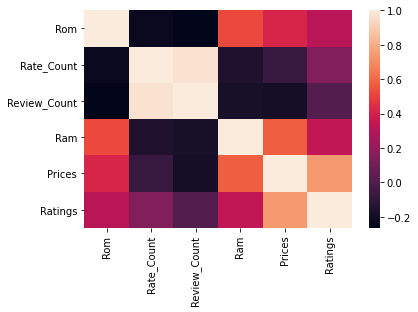

In [123]:
sns.heatmap(df.corr())

<AxesSubplot:>

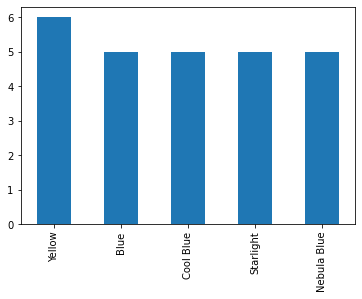

In [124]:
df['Colour'].value_counts().head().plot(kind='bar')

<AxesSubplot:>

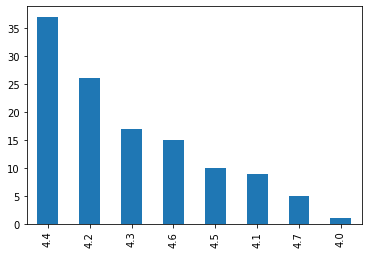

In [125]:
df['Ratings'].value_counts().plot(kind='bar')

In [128]:
df[df['Prices']==df['Prices'].min()]

,Mob_Name,Colour,Rom,Rate_Count,Review_Count,Ram,Prices,Ratings
4,POCO M4 5G,Cool Blue,64,46156,3790,4,11999,4.2
6,POCO M4 Pro 5G,Cool Blue,64,34181,3043,4,11999,4.3
14,POCO M4 5G,Power Black,64,46156,3790,4,11999,4.2
15,POCO M4 Pro 5G,Yellow,64,34181,3043,4,11999,4.3
67,POCO M4 5G,Yellow,64,46156,3790,4,11999,4.2


In [129]:
df[df['Prices']==df['Prices'].max()]

,Mob_Name,Colour,Rom,Rate_Count,Review_Count,Ram,Prices,Ratings
91,APPLE iPhone 14 Plus,Blue,256,546,56,256,85999,4.6
92,APPLE iPhone 14 Plus,Starlight,256,546,56,256,85999,4.6
